# Titanic - Machine Learning from Disaster - Parte 2


- [Dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)
    - É um dataset de **competição**
    - O resultado é avaliado através da **acurácia**:
        - _"Sua pontuação é a porcentagem de passageiros que você prevê corretamente. Isso é conhecido como acurácia."_

Carregamento das bases e tratamento dos dados

In [51]:
# Importando bibliotecas
import pandas as pd

In [52]:
# Leitura do dataset de treino
train = pd.read_csv('train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [53]:
# Leitura do dataset de teste
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [54]:
# Eliminando colunas com alta cardinalidade
train = train.drop(['Name','Cabin', 'Ticket'], axis=1)
test = test.drop(['Name','Cabin', 'Ticket'], axis=1)

In [55]:
# Utilizando a média da coluna para substituir valores nulos
train.loc[train.Age.isnull(), 'Age'] = train.Age.mean()
test.loc[test.Age.isnull(), 'Age'] = test.Age.mean()

In [56]:
# Utilizando a moda para substituir valores nulos na coluna 'Embarked'
train.loc[train.Embarked.isnull(), 'Embarked'] = train.Embarked.mode()[0]

In [57]:
# Utilizando a média da coluna para substituir valores nulos
test.loc[test.Fare.isnull(), 'Fare'] = test.Fare.mean()

Tratamento de dados nas colunas de TEXTO

In [58]:
# Identificação de colunas de texto na base de treino
train.columns[train.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [59]:
# Verificação de dados da coluna "Sex"
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [60]:
# Verificação de dados da coluna "Embarked"
train.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

A coluna 'Sex' será tratada com a criação de uma nova coluna chamada 'Male_Check' com valor 1 se masc e 0 se fem

In [61]:
# Utilização da função Lambda para fazer essa distinção
train['Male_Check'] = train.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [62]:
# Verificação de valores
train[['Sex', 'Male_Check']].value_counts()

Sex     Male_Check
male    1             577
female  0             314
Name: count, dtype: int64

Repetir processo para a base de teste

In [63]:
# Utilização da função Lambda para fazer essa distinção
test['Male_Check'] = test.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [64]:
# Verificação de valores
test[['Sex', 'Male_Check']].value_counts()

Sex     Male_Check
male    1             266
female  0             152
Name: count, dtype: int64

A utilização do 'OneHotEncoder' será usada para tratar a coluna Embarked para **criar uma nova coluna para cada um dos róculos da coluna original**

In [65]:
# Imporando OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Gerando o Encoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [67]:
# Iteração de Fit
ohe = ohe.fit(train[['Embarked']])

In [68]:
# Transformações
ohe.transform(train[['Embarked']]).toarray()


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [69]:
# Transformando resultado em dataframe
ohe_df = pd.DataFrame(ohe.transform(train[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [70]:
# Adicionando coluna na base de treino
train = pd.concat([train, ohe_df], axis=1)

In [71]:
# Verificando valores
train[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0.0         0.0         1.0           646
C         1.0         0.0         0.0           168
Q         0.0         1.0         0.0            77
Name: count, dtype: int64

Repetir processo para a base de **teste** utilizando o Encoder

In [72]:
# Transformando resultado em dataframe
ohe_df = pd.DataFrame(ohe.transform(test[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0


In [73]:
# Adicionando coluna na base de treino
test = pd.concat([test, ohe_df], axis=1)

In [74]:
# Verificando valores
test[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0.0         0.0         1.0           270
C         1.0         0.0         0.0           102
Q         0.0         1.0         0.0            46
Name: count, dtype: int64

In [75]:
# View da base
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0.0,0.0,1.0


In [76]:
# Exluindo as duas colunas já tratadas
train = train.drop(['Sex', 'Embarked'], axis=1)
test = test.drop(['Sex', 'Embarked'], axis=1)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0,0.0,0.0,1.0


In [146]:
X = train.drop(['PassengerId','Survived'], axis=1)
y = train.Survived

In [147]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [148]:
# Importando as bibliotecas de Machine Learning
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [149]:
# Criando o classificador, fazendo o fit e a predict
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_val)

In [150]:
clf_knn = KNeighborsClassifier()
clf_knn = clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_val)

In [151]:
clf_lr = LogisticRegression()
clf_lr = clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_val)

C:\Users\Sepp-Kali-Linux\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation the Accuracy

In [152]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [155]:
accuracy_score(y_val, y_pred_dt)

0.746268656716418

In [156]:
accuracy_score(y_val, y_pred_knn)

0.6940298507462687

In [157]:
accuracy_score(y_val, y_pred_lr)

0.8097014925373134

In [169]:
# Criando o DataFrame com os resultados dos modelos
as_df = pd.DataFrame({
    'modelos': ['Decision Tree', 'KNN', 'Logistic Regression'],
    'inicial': [accuracy_score(y_val, y_pred_dt), accuracy_score(y_val, y_pred_knn), accuracy_score(y_val, y_pred_lr)]
})
as_df

,modelos,inicial
0,Decision Tree,0.746269
1,KNN,0.694030
2,Logistic Regression,0.809701


In [158]:
confusion_matrix(y_test, y_pred_dt)


array([[125,  32],
       [ 36,  75]], dtype=int64)

In [159]:
confusion_matrix(y_test, y_pred_knn)


array([[129,  28],
       [ 54,  57]], dtype=int64)

In [160]:
confusion_matrix(y_test, y_pred_lr)

array([[136,  21],
       [ 30,  81]], dtype=int64)

In [161]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S
445,1,4.000000,0,2,81.8583,1,0.0,0.0,1.0
650,3,29.699118,0,0,7.8958,1,0.0,0.0,1.0
172,3,1.000000,1,1,11.1333,0,0.0,0.0,1.0


In [162]:
test.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Male_Check,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,1,0.0,1.0,0.0,0
1,893,3,47.0,1,0,7.0000,0,0.0,0.0,1.0,0
2,894,2,62.0,0,0,9.6875,1,0.0,1.0,0.0,1


In [163]:
X_test = test.drop(['PassengerId'], axis=1)

In [166]:
y_pred = clf_lr.predict(X_val)

In [142]:
test['Survived'] = y_pred

In [144]:
delivery_base = test[['PassengerId', 'Survived']]

In [145]:
delivery_base.to_csv('attempt2.csv', index=False)

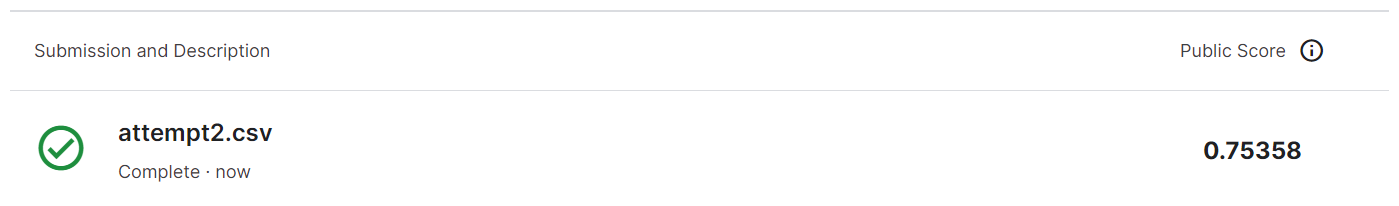

Resultado: 75% de acurácia nas previsões do 'attempt2', em relação a 67% de acurácia nas previsões do 'attempt1'.
- Critério de avaliação do modelo: acurácia
- A segunda versão do sistema alcançou uma acurácia de 75% no score da competição de análise preditiva. A meta é melhorar a acurácia de 75% para 85% no 'attempt3'